In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.layers import Conv2D, UpSampling2D
from tensorflow.python.keras.models import Sequential
from keras.utils import img_to_array, load_img, array_to_img
from sklearn.model_selection import train_test_split
import os
from matplotlib import pyplot as plt

In [2]:
color_images_dir = 'color_img_png'
grayscale_images_dir = 'grey_img_png'

In [3]:
def load_images(directory,target_size=(256,256),color_mode='grayscale'):
    images = []
    for filename in os.listdir(directory):
        image_path=os.path.join(directory,filename)
        image = img_to_array(load_img(image_path,color_mode=color_mode,target_size=target_size))
        #image=tf.image.resize(image,[256,256])
        images.append(image)
    return np.array(images)

In [4]:
print("Loading Images")
color_images = load_images(color_images_dir,target_size=(256,256),color_mode='rgb')
grayscale_images = load_images(grayscale_images_dir,target_size=(256,256),color_mode='grayscale')
print("Images loaded")

Loading Images
Images loaded


In [5]:
color_images = color_images.astype('float32') / 255.
grayscale_images = grayscale_images.astype('float32') / 255.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(grayscale_images, color_images, test_size=0.1)

In [7]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
5/5 [==============================] - 45s 9s/step - loss: 0.0708 - val_loss: 0.0349
Epoch 2/30
5/5 [==============================] - 45s 9s/step - loss: 0.0399 - val_loss: 0.0310
Epoch 3/30
5/5 [==============================] - 45s 9s/step - loss: 0.0319 - val_loss: 0.0227
Epoch 4/30
5/5 [==============================] - 43s 9s/step - loss: 0.0266 - val_loss: 0.0197
Epoch 5/30
5/5 [==============================] - 42s 9s/step - loss: 0.0218 - val_loss: 0.0131
Epoch 6/30
5/5 [==============================] - 43s 9s/step - loss: 0.0156 - val_loss: 0.0076
Epoch 7/30
5/5 [==============================] - 43s 9s/step - loss: 0.0098 - val_loss: 0.0063
Epoch 8/30
5/5 [==============================] - 44s 9s/step - loss: 0.0073 - val_loss: 0.0036
Epoch 9/30
5/5 [==============================] - 43s 9s/step - loss: 0.0052 - val_loss: 0.0032
Epoch 10/30
5/5 [==============================] - 44s 9s/step - loss: 0.0046 - val_loss: 0.0028
Epoch 11/30
5/5 [======================

In [10]:

new_color_image_path=r'temp_convert\WhatsApp Image 2023-12-12 at 12.33.55_9ca3bd63.png'
new_color_image=img_to_array(load_img(new_color_image_path,color_mode='rgb',target_size=(256,256)))

new_bw_img=img_to_array(load_img(new_color_image_path,color_mode='grayscale',target_size=(256,256)))

new_bw_img=new_bw_img.astype('float32')/255

new_bw_img=new_bw_img.reshape(1,256,256,1)

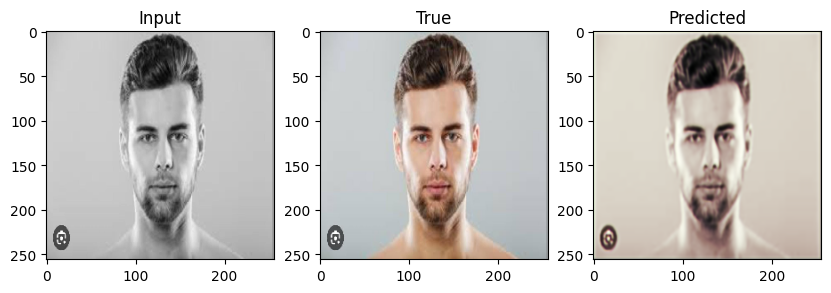

In [14]:
# Predict on a sample grayscale image
output = model.predict(new_bw_img)

# Show the grayscale input image, true image, and the prediction from the model
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.title('Input')
plt.imshow(new_bw_img.squeeze(),cmap='gray')
plt.subplot(1, 3, 2)
plt.title('True')
plt.imshow(array_to_img(new_color_image))
plt.subplot(1, 3, 3)
plt.title('Predicted')
plt.imshow(array_to_img(output[0]))
plt.show()
